In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install swifter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 490.6/490.6 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.7 MB/s eta 0:00:00
  Created wheel for swifter: filename=swifter-1.3.5-py3-none-any.whl size=16518 sha256=973455aefbec94e446794d5cd908a0735f4b2334d043be67078230e559902ba2
  Stored in directory: /root/.cache/pip/wheels/00/7e/8c/438ea309a16ef1a9130849060f962e0d2c4e94b8a4314d5919
Successfully built swifter


In [3]:
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.6/356.6 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.6.0-py2.py3-none-any.whl size=351311 sha256=db8b4947dabf29e10a5abee28f96497b40a15330125affee4961b1493715d7dc
  Stored in directory: /root/.cache/pip/wheels/ea/0b/64/114bc939d0083621aa41521e21be246c888260b8aa21e6c1ad
Successfully built emoji


In [4]:
import pandas as pd
import numpy as np

#Progress bars
from tqdm import tqdm
tqdm.pandas()

#Paralelize pandas apply on multiple cores
import swifter

#One-hot encodding
from sklearn.preprocessing import LabelBinarizer

import matplotlib.pyplot as plt

import emoji
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

from gensim.models import KeyedVectors

Merge the dataset we need

In [5]:
fakenews_path = "/content/drive/Shareddrives/DS4A_Fakenews/data/Getting_Real_about_Fake_News(big data—train).csv"


In [6]:
df_fakenews = pd.read_csv(fakenews_path)
df_fakenews

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12994,f1b5d0e44803f48732bde854a9fdf95837219b12,2,replaceme,2016-10-26T23:58:00.000+03:00,NaN,It DOES allow you to put a dog face on top of ...,english,2016-10-27T00:37:46.194+03:00,zerohedge.com,US,2435.0,"Snapchat To Raise Up To $4 Billion In IPO, Val...",0.000,NaN,40,32,0,0,0,bs
12995,36011ceba3647e1bea78299b68b6fb705a1fc1ad,3,Freedumb,2016-10-27T00:02:00.000+03:00,NaN,Wait till you see what happens to the valuatio...,english,2016-10-27T00:37:46.220+03:00,zerohedge.com,US,2435.0,"Snapchat To Raise Up To $4 Billion In IPO, Val...",0.000,NaN,40,32,0,0,0,bs
12996,6995d1aa9ac99926106489b14b5530e85358059a,4,major major maj...,2016-10-27T00:06:00.000+03:00,NaN,I'm waiting for the one that puts a pussy on m...,english,2016-10-27T00:37:46.244+03:00,zerohedge.com,US,2435.0,"Snapchat To Raise Up To $4 Billion In IPO, Val...",0.000,NaN,40,32,0,0,0,bs
12997,7de8ae90eee164eb756db6c8a3772288e11d7a94,5,beemasters,2016-10-27T00:09:00.000+03:00,NaN,$4 Billion even after they are known to be kee...,english,2016-10-27T00:37:46.247+03:00,zerohedge.com,US,2435.0,"Snapchat To Raise Up To $4 Billion In IPO, Val...",0.000,NaN,40,32,0,0,0,bs


In [7]:
df_fakenews.columns


Index(['uuid', 'ord_in_thread', 'author', 'published', 'title', 'text',
       'language', 'crawled', 'site_url', 'country', 'domain_rank',
       'thread_title', 'spam_score', 'main_img_url', 'replies_count',
       'participants_count', 'likes', 'comments', 'shares', 'type'],
      dtype='object')

In [8]:
df_fakenews.shape

(12999, 20)

In [9]:
df_fakenews["type"].value_counts()

bs            11492
bias            443
conspiracy      430
hate            246
satire          146
state           121
junksci         102
fake             19
Name: type, dtype: int64

Drop the column 'bs'

In [10]:
df_fakenews = df_fakenews[df_fakenews["type"] != "bs"]
df_fakenews["type"].value_counts()

bias          443
conspiracy    430
hate          246
satire        146
state         121
junksci       102
fake           19
Name: type, dtype: int64

In [11]:
df_fakenews["language"].value_counts()

english    1503
ignore        3
french        1
Name: language, dtype: int64

only retain the rows in English

In [12]:
df_fakenews = df_fakenews[df_fakenews["language"] == "english"]

In [13]:
df_fakenews = df_fakenews[["title", "text", "type"]]

In [14]:
df_fakenews.head()

,title,text,type
0,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,bias
1,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,bias
2,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,bias
3,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,bias
4,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,bias


types with "conspiracy", "hate", "satire", "state", "junksci" are all labeled as "fake"

In [15]:
df_fakenews["type"].replace("conspiracy", "fake", inplace=True)
df_fakenews["type"].replace("hate", "fake", inplace=True)
df_fakenews["type"].replace("satire", "fake", inplace=True)
df_fakenews["type"].replace("state", "fake", inplace=True)
df_fakenews["type"].replace("junksci", "fake", inplace=True)

In [16]:
df_fakenews["type"].value_counts()

fake    1060
bias     443
Name: type, dtype: int64

# **Fake.csv**

In [17]:
onlyfake_path = "/content/drive/Shareddrives/DS4A_Fakenews/data/True or False/Fake.csv"

In [18]:
df_onlyfake = pd.read_csv(onlyfake_path)

In [19]:
df_onlyfake.shape

(23481, 4)

In [20]:
df_onlyfake["type"] = "fake"
df_onlyfake.head()

,title,text,subject,date,type
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [21]:
df_onlyfake = df_onlyfake[["title", "text", "type"]]
df_onlyfake.head()

,title,text,type
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,fake


# **True.csv**

In [22]:
onlytrue_path = "/content/drive/Shareddrives/DS4A_Fakenews/data/True or False/True.csv"

In [23]:
df_onlytrue = pd.read_csv(onlytrue_path)
df_onlytrue.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [24]:
df_onlytrue["type"] = "true"
df_onlytrue = df_onlytrue[["title", "text", "type"]]
df_onlytrue.head()

,title,text,type
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,true
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,true
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,true


# Merge three datasets

In [25]:
# https://www.skytowner.com/explore/concatenating_dataframes_vertically_in_pandas_dataframe

df_news = pd.concat([df_fakenews, df_onlyfake, df_onlytrue], ignore_index=True)
df_news

,title,text,type
0,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,bias
1,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,bias
2,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,bias
3,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,bias
4,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,bias
...,...,...,...
46396,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,true
46397,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",true
46398,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,true
46399,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,true


In [26]:
df_news["type"].value_counts()

fake    24541
true    21417
bias      443
Name: type, dtype: int64

# **Data Preprocessing**

In [27]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [28]:
# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://pythonspot.com/nltk-stop-words/

In [29]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [30]:
stop_words = set(stopwords.words('english'))  #stopwords list
print(stop_words)

{'mightn', 'not', 'doing', 'for', 'wasn', 'just', 'can', 'she', 'couldn', 'shouldn', 'here', 'a', 'him', 'their', 'been', 'don', "needn't", 'll', 'after', 'until', 'very', 'those', 'which', 'needn', 'through', 's', 'these', "mustn't", 'from', 'in', 'hers', 'being', 'above', 'all', 'his', 'over', 'against', 'own', 'whom', 'be', 'up', 'nor', 'so', 'down', 'off', 'i', 'that', 'ourselves', 'hasn', 'when', 'our', 'have', 'ain', 'having', 'does', "you'll", 'you', 'is', 'out', 'how', "shan't", "you've", 'what', 'there', "hasn't", 'only', 'before', 'they', 'was', "she's", 'any', 'more', "that'll", 'as', "won't", 'wouldn', 'once', 'themselves', 'it', 'where', 'were', 'y', 're', "it's", 'has', "don't", 'had', 'between', 'too', 'd', 'such', 'because', 'most', 'ma', 'who', 'weren', 'during', 'then', 'are', 'few', 'some', 'o', 'why', 'both', 've', 'at', 'will', 't', "doesn't", 'of', "you're", 'on', 'yourselves', 'aren', 'shan', 'do', 'hadn', 'now', 'further', 'won', "aren't", 'each', 'her', 'this',

In [31]:
'not' in stop_words

True

# Thus we are not going to remove the stopword for the sentiment analysis part

In [32]:
# Load the pre-trained word vectors
model = KeyedVectors.load_word2vec_format("/content/drive/Shareddrives/DS4A_Fakenews/data/GoogleNews-vectors-negative300.bin",
                                          binary=True, limit=50000)

In [33]:
embed_mat = np.zeros((50000,300))
for i in model.index_to_key:
    embed_mat[model.key_to_index[i]] = model[i]

In [34]:
def preprocess_text(text):
    # checks if the input text is a float.
    # If it is, the function returns an empty string. Otherwise, it proceeds with the preprocessing steps.
    if isinstance(text, float):
        return ''

    # Lowercase the text
    text = str(text).lower()

    # Remove emojis
    text = emoji.demojize(text)
    text = text.replace(":", "")

    # Remove punctuation and digits
    text = text.translate(str.maketrans('', '', string.punctuation + string.digits))

    # Tokenize the text
    words = word_tokenize(text)

    # Remove stop words
    #words = [word for word in words if word not in stop_words]

    # Filter words based on KeyedVectors model vocabulary
    words = [word for word in words if word in model.key_to_index]

    # Join the words back into a string
    text = ' '.join(words)

    return text


In [35]:
preprocess_text("I'd like to have some coffee today! Hope this is tasty!")

'id like have some coffee today hope this is tasty'

In [36]:
# Apply preprocessing to the 'text' column
df_news['clean_text'] = df_news['text'].apply(preprocess_text)

In [37]:
# Apply preprocessing to the 'title' column
df_news['title'] = df_news['title'].apply(preprocess_text)

In [38]:
df_news.head()

,title,text,type,clean_text
0,busted they stole millions in gov t benefits,Print They should pay all the back all the mon...,bias,print they should pay all the back all the mon...
1,re why did attorney general plead the fifth,Why Did Attorney General Loretta Lynch Plead T...,bias,why did attorney general plead the fifth briga...
2,breaking cooperating with on email investigation,Red State : \nFox News Sunday reported this mo...,bias,red state fox news reported this morning that ...
3,pin drop speech by father daughter kidnapped k...,Email Kayla Mueller was a prisoner and torture...,bias,email was prisoner tortured by while no chance...
4,fantastic trumps point plan reform healthcare ...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,bias,email healthcare reform make great again since...


# Word Cloud

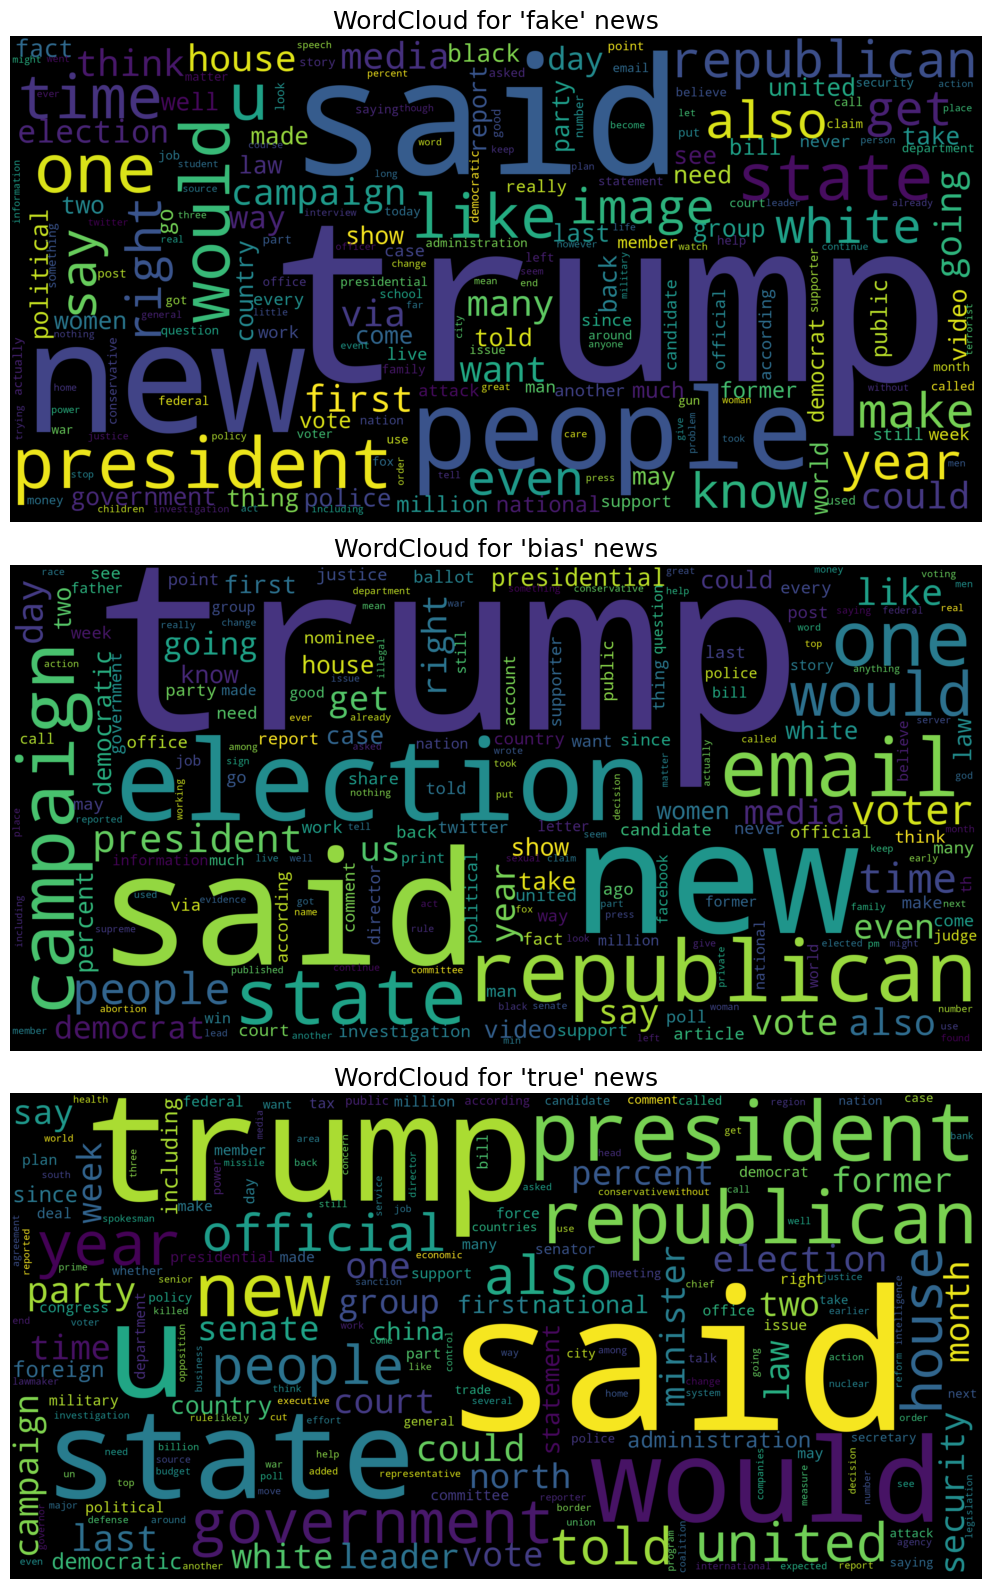

In [39]:
from wordcloud import WordCloud


# Create a subplot with 3 rows and 1 column, and set the figure size
fig, ax = plt.subplots(3, 1, figsize=(16, 16))

# Word cloud for 'fake' news
corpus_text = ' '.join(df_news[df_news['type'] == 'fake']['clean_text'].tolist())
wordcloud = WordCloud(stopwords=stop_words, scale=7, collocations=False).generate(corpus_text)
ax[0].imshow(wordcloud, interpolation='bilinear')
ax[0].axis("off")
ax[0].set_title("WordCloud for 'fake' news", fontsize=18)

# Word cloud for 'bias' news
corpus_text = ' '.join(df_news[df_news['type'] == 'bias']['clean_text'].tolist())
wordcloud = WordCloud(stopwords=stop_words, scale=7, collocations=False).generate(corpus_text)
ax[1].imshow(wordcloud, interpolation='bilinear')
ax[1].axis("off")
ax[1].set_title("WordCloud for 'bias' news", fontsize=18)

# Word cloud for 'true' news
corpus_text = ' '.join(df_news[df_news['type'] == 'true']['clean_text'].tolist())
wordcloud = WordCloud(stopwords=stop_words, scale=7, collocations=False).generate(corpus_text)
ax[2].imshow(wordcloud, interpolation='bilinear')
ax[2].axis("off")
ax[2].set_title("WordCloud for 'true' news", fontsize=18)

# Adjust the layout of the plot
plt.tight_layout()
plt.show()

# psychological analysis
Analyze the news by people use:

First person: I, me, my, mine, we, usk our, ours

Second person: you, you, your, yours

Third person: he, she, his, her, him, his, hers, they, them, their of her, theirs

In [40]:
from nltk.tokenize import RegexpTokenizer
def tokenize(text):
    tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+')
    tokens = tokenizer.tokenize(text)
    return tokens

def count_person_forms(text, person):
    """
    Cuenta las ocurrencias de los tokens de person en el texto
    """
    text = tokenize(text.lower())
    counter = 0
    for word in text:
        if word in person:
            counter += 1
    return counter

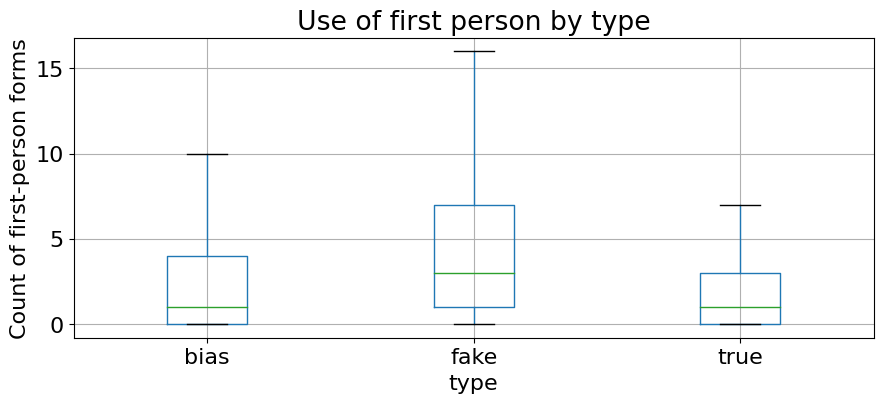

In [45]:
import matplotlib.pyplot as plt

first_person = ["i", "me", "mine", "we", "us", "our", "ours"]
second_person = ["you", "your", "yours"]

df_news['text'] = df_news['text'].astype(str)
df_news['first_person'] = df_news.apply(lambda row: count_person_forms(row['text'], first_person), axis=1)

plt.rcParams.update({'font.size': 16})  # Adjust font size here
fig, ax = plt.subplots(1,1, figsize=(10,4))

df_news.boxplot(column=['first_person'], by='type', ax=ax, showfliers=False)
ax.set_ylabel("Count of first-person forms")
ax.set_title("Use of first person by type")
fig.suptitle("")
plt.show()


In [47]:
df_news.groupby('type')['first_person'].mean()

type
bias    3.627540
fake    5.263355
true    1.968716
Name: first_person, dtype: float64

Pandas Apply:   0%|          | 0/46401 [00:00<?, ?it/s]

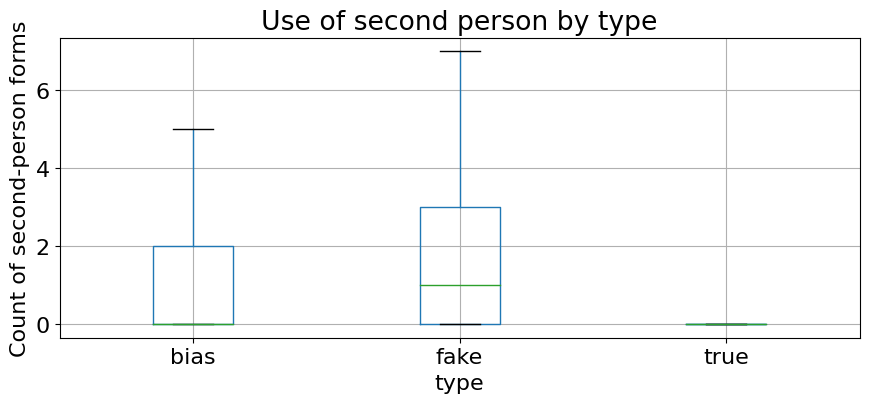

In [46]:
df_news['second_person'] = df_news.swifter.apply(lambda row: count_person_forms(row['text'], second_person), axis=1)
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(1,1, figsize=(10,4))
df_news.boxplot(column=['second_person'], by='type', ax=ax, showfliers=False)
ax.set_ylabel("Count of second-person forms")
ax.set_title("Use of second person by type")
fig.suptitle("")
plt.show()

In [48]:
df_news=df_news.drop(['first_person'], axis=1)
df_news=df_news.drop(['second_person'], axis=1)

# Sentiment Analysis

In [49]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [50]:
import re


In [51]:
def classify_sentiment(text):
    sid = SentimentIntensityAnalyzer()
    text = text.replace("\n\n", ". ").replace("\n", ". ")
    #Remove URLs
    text = re.sub(r"http\S+", "", text)
    pol = sid.polarity_scores(text)['compound']
    return pol

In [52]:
df_news['sent'] = df_news.swifter.apply(lambda r: classify_sentiment(r['clean_text']), axis=1)


Pandas Apply:   0%|          | 0/46401 [00:00<?, ?it/s]

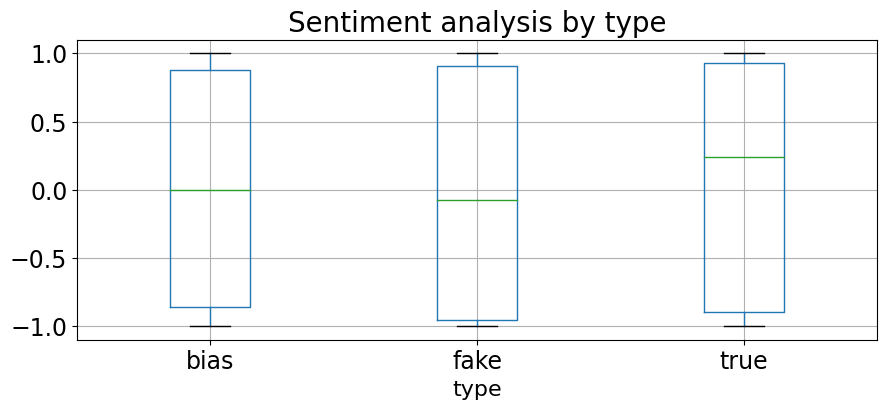

In [53]:
fig, ax = plt.subplots(1,1, figsize=(10,4))
df_news.boxplot(column=['sent'], by='type', ax=ax, showfliers=False, fontsize=17)
ax.set_title("Sentiment analysis by type", fontsize=20)
fig.suptitle("")
plt.show()

In [ ]:
import seaborn as sns

<ipython-input-52-3c0fa935f14e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_news[df_news['type']=='fake']['sent'], ax=ax[0])
<ipython-input-52-3c0fa935f14e>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_news[df_news['type']=='true']['sent'], ax=ax[1])
<ipython-input-52-3c0fa935f14e

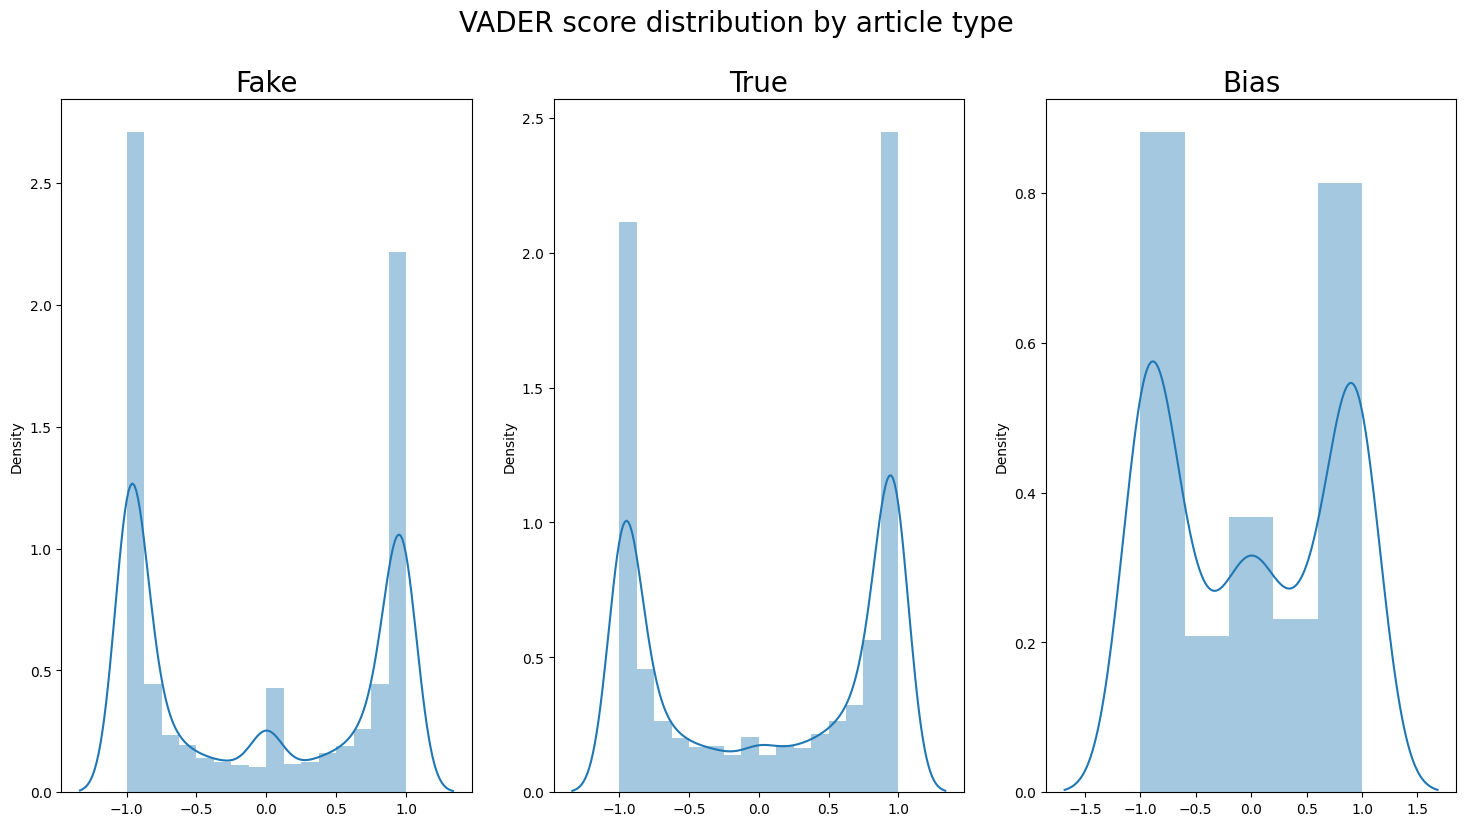

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(18,9))
fig.suptitle("VADER score distribution by article type", size=20)

sns.distplot(df_news[df_news['type']=='fake']['sent'], ax=ax[0])
ax[0].set_title("Fake", fontsize=20)
ax[0].set_xlabel("")

sns.distplot(df_news[df_news['type']=='true']['sent'], ax=ax[1])
ax[1].set_title("True", fontsize=20)
ax[1].set_xlabel("")

sns.distplot(df_news[df_news['type']=='bias']['sent'], ax=ax[2])
ax[2].set_title("Bias", fontsize=20)
ax[2].set_xlabel("")

plt.show()
